In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv("./laptops.csv")


In [3]:
df.head()

,Laptop,Status,Brand,Model,CPU,RAM,Storage,Storage type,GPU,Screen,Touch,Final Price
0,ASUS ExpertBook B1 B1502CBA-EJ0436X Intel Core...,New,Asus,ExpertBook,Intel Core i5,8,512,SSD,NaN,15.6,No,1009.00
1,Alurin Go Start Intel Celeron N4020/8GB/256GB ...,New,Alurin,Go,Intel Celeron,8,256,SSD,NaN,15.6,No,299.00
2,ASUS ExpertBook B1 B1502CBA-EJ0424X Intel Core...,New,Asus,ExpertBook,Intel Core i3,8,256,SSD,NaN,15.6,No,789.00
3,MSI Katana GF66 12UC-082XES Intel Core i7-1270...,New,MSI,Katana,Intel Core i7,16,1000,SSD,RTX 3050,15.6,No,1199.00
4,HP 15S-FQ5085NS Intel Core i5-1235U/16GB/512GB...,New,HP,15S,Intel Core i5,16,512,SSD,NaN,15.6,No,669.01


In [4]:
df.columns=df.columns.str.lower().str.replace(' ','_')
df.head(2)

,laptop,status,brand,model,cpu,ram,storage,storage_type,gpu,screen,touch,final_price
0,ASUS ExpertBook B1 B1502CBA-EJ0436X Intel Core...,New,Asus,ExpertBook,Intel Core i5,8,512,SSD,NaN,15.6,No,1009.0
1,Alurin Go Start Intel Celeron N4020/8GB/256GB ...,New,Alurin,Go,Intel Celeron,8,256,SSD,NaN,15.6,No,299.0


In [5]:
df_new = df[['ram','storage','screen','final_price']]
df_new.head()

,ram,storage,screen,final_price
0,8,512,15.6,1009.00
1,8,256,15.6,299.00
2,8,256,15.6,789.00
3,16,1000,15.6,1199.00
4,16,512,15.6,669.01


In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

<Axes: xlabel='final_price', ylabel='Count'>

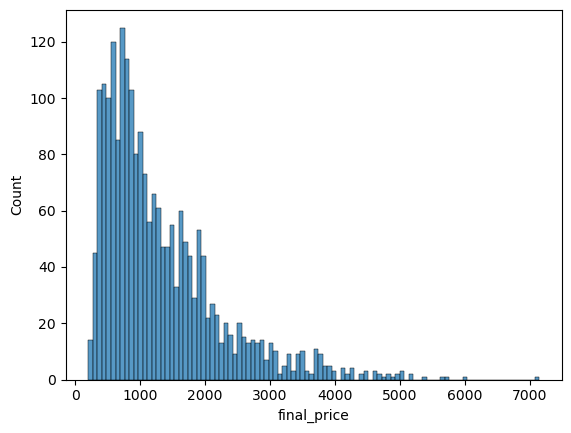

In [7]:
sns.histplot(df_new.final_price,  bins=100)

# Question 1

In [8]:
df_new.isnull().sum()

ram            0
storage        0
screen         4
final_price    0
dtype: int64

# Question 2

In [9]:
df_new.ram.median()

16.0

## Split dataset

In [10]:
n = len(df_new)
n_val = int(n*0.2)
n_test = int(n*0.2)
n_train= n - (n_val + n_test)

In [11]:
np.random.seed(42)
idx = np.arange(n)
np.random.shuffle(idx)
idx

array([2079,  668, 2073, ..., 1130, 1294,  860])

In [12]:
df_val = df_new.iloc[idx[:n_val]]
df_test = df_new.iloc[idx[n_val:n_test+n_val]]
df_train = df_new.iloc[idx[n_test+n_val:]]

In [13]:
y_train = np.log1p(df_train.final_price.values)
y_test = np.log1p(df_test.final_price.values)
y_val = np.log1p(df_val.final_price.values)

In [14]:
del df_train['final_price']
del df_test['final_price']
del df_val['final_price']

# Question 3

In [15]:
def train_linear_reg(X,y):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])
    
    XTX = np.dot(X.T,X)
    inv = np.linalg.inv(XTX)
    w = np.linalg.multi_dot([inv,X.T,y])
    
    return w[0], w[1:]

In [16]:
def prepare_X(df, value):
    
    #Faire une copie utilisée dans la fct pour pas que données originales soient modifiées
    df = df.copy() 
    df = df.fillna(value)
    X = df.values
    
    return X

In [17]:
def rmse(y,y_pred):
    error = (y-y_pred)**2
    mse = error.mean()
    return np.sqrt(mse)

## Replace missing values by 0 and training model

In [18]:
X_train0 = prepare_X(df_train, 0)

In [19]:
w0_0, w_0 = train_linear_reg(X_train0, y_train)
w0_0, w_0

(6.721638707698162, array([ 0.02839578,  0.00080745, -0.04472616]))

In [20]:
y_pred_0 = w0_0 + np.dot(X_train0, w_0)
y_pred_0

array([8.01711268, 6.34223684, 7.35725696, ..., 6.56065474, 6.73605415,
       7.72213706])

In [21]:
#sns.histplot(y_pred_0, color='red', alpha=0.5, bins=50)
#sns.histplot(y_train, color='blue', alpha=0.5, bins=50)

## Replace missing values by mean and training model

In [22]:
moy = df_train.screen.mean()

In [23]:
X_train = prepare_X(df_train, moy)

In [24]:
w0, w = train_linear_reg(X_train, y_train)
w0, w

(6.850925366086358, array([ 0.02858496,  0.00081333, -0.05355449]))

In [25]:
y_pred = w0 + np.dot(X_train, w)
y_pred

array([8.00845187, 6.37005966, 7.37185179, ..., 6.57554277, 6.74626709,
       7.72210221])

In [26]:
#sns.histplot(y_pred, color='red', alpha=0.5, bins=50)
#sns.histplot(y_train, color='blue', alpha=0.5, bins=50)

## Validation and RMSE computation

In [27]:
X_val0 = prepare_X(df_val, 0)
w0_0, w_0 = train_linear_reg(X_val0, y_val)
y_pred_val_0 = w0_0 + np.dot(X_val0, w_0)
score0 = rmse(y_pred_val_0,y_val)
print(round(score0, 2))


0.46


In [28]:
X_val = prepare_X(df_val, moy)
w0, w = train_linear_reg(X_val, y_val)
y_pred_val = w0 + np.dot(X_val, w)
score = rmse(y_pred_val,y_val)
round(score,2)

0.46

# Question 4

In [29]:
def train_linear_regression_reg(X, y, r=0.001):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    XTX = XTX + r * np.eye(XTX.shape[0])

    XTX_inv = np.linalg.inv(XTX)
    w_full = XTX_inv.dot(X.T).dot(y)
    
    return w_full[0], w_full[1:]

In [30]:
X_train = prepare_X(df_train, 0)

for r in [0, 0.01, 0.1, 1, 5, 10, 100]:
    w0, w = train_linear_regression_reg(X_train, y_train, r=r)

    X_val = prepare_X(df_val, 0)
    y_pred = w0 + X_val.dot(w)
    score = rmse(y_val, y_pred)
    
    print(r, round(score,2))

0 0.47
0.01 0.47
0.1 0.47
1 0.48
5 0.52
10 0.57
100 0.74


# Question 5

In [31]:
scores = []
for value in [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]:  
    
    np.random.seed(value)
    idx = np.arange(n)
    np.random.shuffle(idx)

    df_val = df_new.iloc[idx[:n_val]]
    df_test = df_new.iloc[idx[n_val:n_test+n_val]]
    df_train = df_new.iloc[idx[n_test+n_val:]]
    
    y_train = (df_train.final_price.values)
    y_test = (df_test.final_price.values)
    y_val = (df_val.final_price.values)

    del df_train['final_price']
    del df_test['final_price']
    del df_val['final_price']
    
    X_train = prepare_X(df_train, 0)
    w0, w = train_linear_reg(X_train, y_train)
    w0, w
    y_pred = w0 + np.dot(X_train, w)
    y_pred

    X_val = prepare_X(df_val, 0)
    w0, w = train_linear_reg(X_val, y_val)
    y_pred_val = w0 + np.dot(X_val, w)
    score = rmse(y_pred_val,y_val)
    scores.append(score)

    print(score)

586.6251069763455
548.133863835524
613.9746306979241
576.8595222165344
556.0781378227023
582.5205723193245
591.8058598793602
590.9384428681417
541.7547461738118
525.0042931838092


In [32]:
np.std(scores)

26.08350510649222

In [33]:
#df_describe = pd.DataFrame(scores)
#df_describe.describe()

# Question 6

In [34]:
np.random.seed(9)
idx = np.arange(n)
np.random.shuffle(idx)

df_val = df_new.iloc[idx[:n_val]]
df_test = df_new.iloc[idx[n_val:n_test+n_val]]
df_train = df_new.iloc[idx[n_test+n_val:]]

y_train = (df_train.final_price.values)
y_test = (df_test.final_price.values)
y_val = (df_val.final_price.values)

del df_train['final_price']
del df_test['final_price']
del df_val['final_price']
    

In [35]:
df_full_train = pd.concat([df_train, df_val])
df_full_train= df_full_train.reset_index(drop=True)
X_full_train = prepare_X(df_full_train,0)
X_full_train

array([[   8. ,  512. ,   16. ],
       [   8. ,  256. ,   15.6],
       [  16. , 1000. ,   14. ],
       ...,
       [  32. , 1000. ,   17. ],
       [   8. ,  512. ,   15.6],
       [  32. , 1000. ,   16.1]])

In [36]:
y_full_train = np.concatenate([y_train, y_val])
w0, w = train_linear_regression_reg(X_full_train, y_full_train, r=0.001)

In [37]:
X_test = prepare_X(df_test,0)
y_pred = w0 + X_test.dot(w)
score = rmse(y_test, y_pred)
score

674.243226577237